In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load data
data = pd.read_csv(r"C:\Users\ayode\OneDrive\Desktop\Sales Forecasting\ElectroTech_Forecasting\ElectroTech_Forecasting_Data.csv")

In [3]:
#vuew the loaded data
data

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81
...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055551,53.747320,Spec_A,Long-Battery-Life,182
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287


In [4]:
#check the properties of the data loaded.
print(f"{data.info()}")
print("-" * 40)
print(f"{data.isnull().sum()}")
print("-" * 40)
print(f"{data.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136193 entries, 0 to 136192
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Product_ID                 136193 non-null  int64  
 1   Category                   136193 non-null  object 
 2   Price                      136193 non-null  float64
 3   Date                       136193 non-null  object 
 4   Season                     136193 non-null  object 
 5   Market_Trend_Index         136193 non-null  float64
 6   Competitor_Activity_Score  136193 non-null  float64
 7   Consumer_Confidence_Index  136193 non-null  float64
 8   Product_Specification_1    136193 non-null  object 
 9   Product_Specification_2    136193 non-null  object 
 10  Sales_Volume               136193 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 11.4+ MB
None
----------------------------------------
Product_ID                   0
Category

These are the finding from the above statictical check.
- There is no missing values
- There is no duplicated values
- we have float64(4), int64(2), object(5)

We will further investigate the object columns and convert them.

In [5]:
#check the unique values for the categorical variables
data_object= data.select_dtypes(include='object')
for column in data_object.columns:
    print(column)
    print(f"Unique values: {data_object[column].unique()}")
    print("-" * 40)


Category
Unique values: ['Laptop' 'Tablet' 'Smartphone' 'Accessories']
----------------------------------------
Date
Unique values: ['2009-01-01' '2009-01-02' '2009-01-03' ... '2020-12-28' '2020-12-29'
 '2020-12-30']
----------------------------------------
Season
Unique values: ['Winter' 'Spring' 'Summer' 'Fall']
----------------------------------------
Product_Specification_1
Unique values: ['Spec_C' 'Spec_B' 'Spec_A']
----------------------------------------
Product_Specification_2
Unique values: ['Long-Battery-Life' 'Lightweight' 'High-Resolution']
----------------------------------------


The first conversion will be for the date column

In [6]:
#convert to datetime datatype
data["Date"]=data["Date"].astype("datetime64[ns]")

In [7]:
#check data type
data["Date"].dtype

dtype('<M8[ns]')

The data type has been converted from object to datetime

In [8]:
data.head()

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81


In [9]:
"""
check the statistical summary of the data.
This will exclude the object datatype
"""

data.describe()

,Product_ID,Price,Date,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Sales_Volume
count,136193.000000,136193.000000,136193,136193.000000,136193.000000,136193.000000,136193.000000
mean,1347.703384,106.812513,2014-12-22 05:17:20.062264320,-0.000277,-0.000656,70.013109,122.305140
min,1001.000000,40.510000,2009-01-01 00:00:00,-4.067055,-4.181590,40.044830,6.000000
25%,1174.000000,75.560000,2011-12-29 00:00:00,-0.683015,-0.676466,57.521063,81.000000
50%,1348.000000,104.710000,2014-12-19 00:00:00,0.001093,0.000555,70.022715,119.000000
75%,1522.000000,138.310000,2017-11-27 00:00:00,0.680506,0.674953,82.569582,161.000000
max,1694.000000,181.800000,2020-12-30 00:00:00,4.728391,4.661979,99.926291,306.000000
std,200.341518,36.419229,NaN,1.009105,1.001551,14.733722,54.320849


from the above statistics summary above;
- all the features are normally distributed because the mean is closer to the median

In [10]:
#Turn numerical column into list
data_num=data.select_dtypes(exclude=['object','datetime64[ns]']).iloc[:,1:].columns.to_list()

data_num

['Price',
 'Market_Trend_Index',
 'Competitor_Activity_Score',
 'Consumer_Confidence_Index',
 'Sales_Volume']

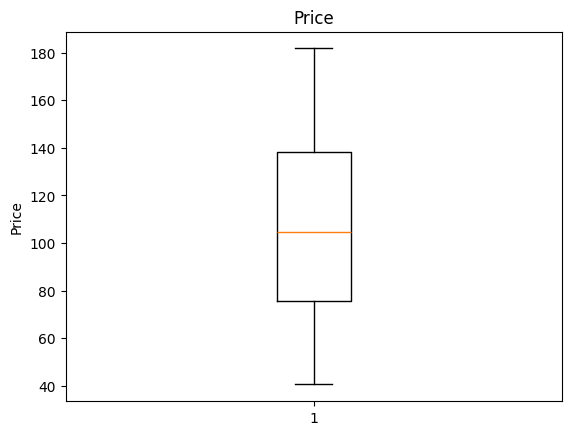

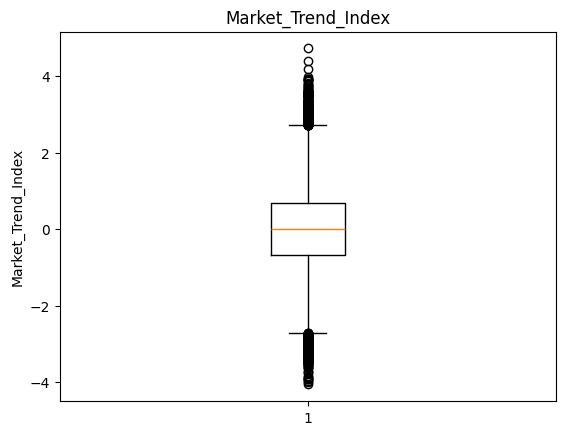

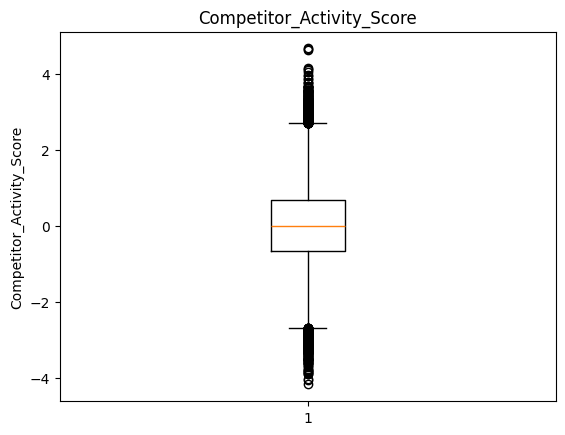

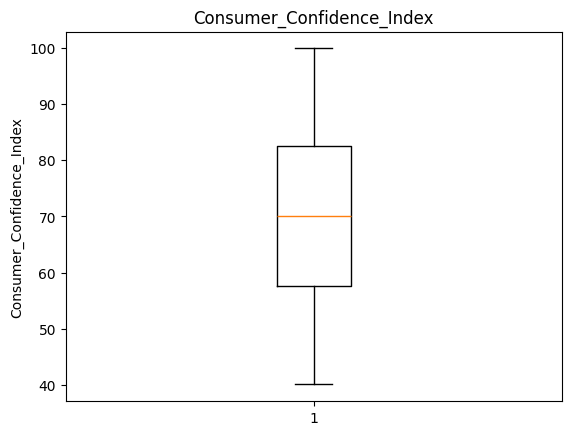

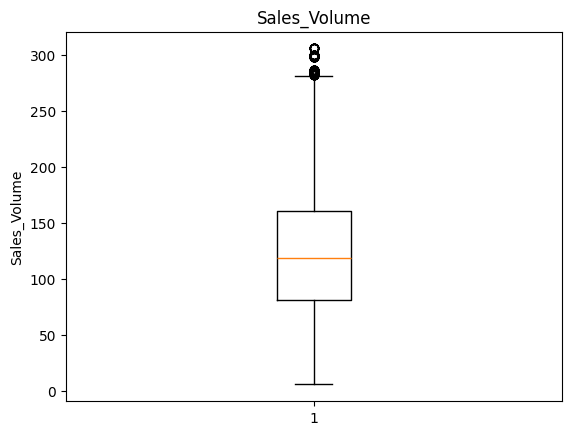

In [11]:
#plot a boxplot for the columns selected
for column in data_num:
    plt.figure()  # creates a new figure for each plot
    plt.boxplot(data=data, x=column)
    plt.title(column)
    plt.ylabel(column)
    plt.show()

In [12]:
# save data as cleaned data
data.to_csv(r'C:\Users\ayode\OneDrive\Desktop\Sales Forecasting\ElectroTech_Forecasting\cleaned_data.csv', index=False)